### 웹툰 정보 EDA

In [80]:
df_info = pd.read_csv("data_Juno/webtoon_naver_info_by_genres_seperated.csv")
df_info.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,daily,comic,fantasy,action,drama,pure,sensibility,thrill,historical,sports
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,None,None,story,None,None,None,None,None,None,None,None,None,None
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,None,None,story,None,None,None,None,drama,None,sensibility,None,None,None
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,None,None,story,None,None,fantasy,None,drama,None,None,None,None,None
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,None,None,story,None,comic,None,None,drama,None,None,None,None,None
745,716164,로베스의 완전감각,정샛별,9.88,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.09.04,None,None,story,None,None,fantasy,action,None,None,None,None,None,None


In [81]:
df_info['count'] = 1

In [22]:
# 한글 폰트 적용
import matplotlib.font_manager as fm
font_location = "C:\\Windows\Fonts\malgunbd.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
print(font_name)
mpl.rc("font", family=font_name)

Malgun Gothic


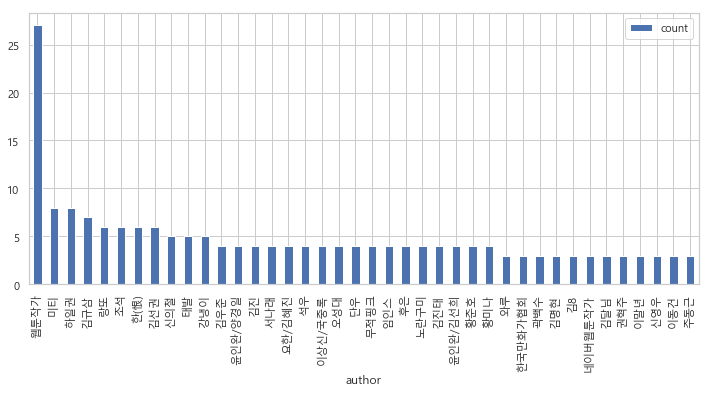

In [83]:
# 작가별 작품 수
author_count = df_info[['author','count']].groupby(['author']).sum().sort_values(by='count', ascending=False)
author_count[:40].plot(kind='bar',figsize=(12,5), )

In [134]:
# 작가별 평균 평점과 작품갯수
author_score_cnt = df_info[['author','total_score','count']].groupby(['author']).agg({'total_score':np.mean, 'count':np.sum})
author_score_cnt.tail()

,total_score,count
author,,
황준호/수연,9.940000,1
후렛샤/김홍태,9.956667,3
후렛샤/임진국,9.950000,1
후은,9.967500,4
히가시무라아키코,9.780000,1


In [138]:
author_score_cnt.sort_values(by=['total_score','count'], ascending=False)[:20]

,total_score,count
author,,
조현아,9.99,1
김칸비/황영찬,9.98,2
돌배,9.98,2
CRG/김규삼,9.98,1
QTT,9.98,1
cosmos/반지,9.98,1
까마중,9.98,1
나,9.98,1
남수,9.98,1


In [94]:
dic = {}
dic['column'] = []
dic['count'] = []
for column in df_info.columns[7:-1]:
    print(column)
    dic['count'].append(df_info[column].value_counts()[column])
    dic['column'].append(column)
dic

episode
omnibus
story
daily
comic
fantasy
action
drama
pure
sensibility
thrill
historical
sports


{'column': ['episode',
  'omnibus',
  'story',
  'daily',
  'comic',
  'fantasy',
  'action',
  'drama',
  'pure',
  'sensibility',
  'thrill',
  'historical',
  'sports'],
 'count': [114, 78, 554, 109, 177, 220, 87, 306, 97, 57, 104, 33, 12]}

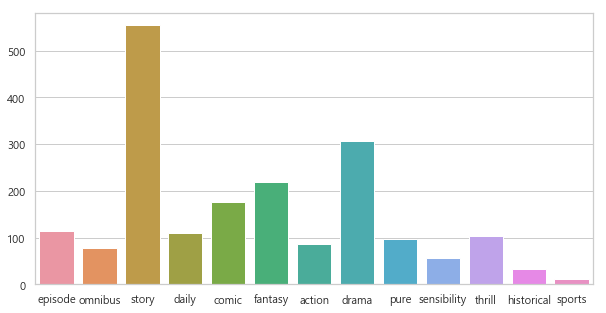

In [98]:
# 장르별 작품 수
plt.figure(figsize=(10,5))
sns.barplot(x=dic['column'], y=dic['count'])

In [99]:
# 작품별 장르 수
df_info2 = pd.read_csv("data_Juno/webtoon_naver_info_by_genres.csv")
df_info2.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,genre
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,story/pure/sensibility
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,story
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,story/drama/sensibility
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,story/fantasy/drama
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,story/comic/drama


In [140]:
# only 스토리 장르
df_info2[df_info2['genre'] == 'story'].size

135

In [101]:
import re

In [106]:
df_info2['genre_count'] = df_info2['genre'].map(lambda x :len(re.findall('/',x)) + 1)

In [122]:
genre_count = df_info2['genre_count'].value_counts().reset_index()
genre_count.sort_values(by='index', inplace=True)
genre_count.reset_index(drop=True, inplace=True)

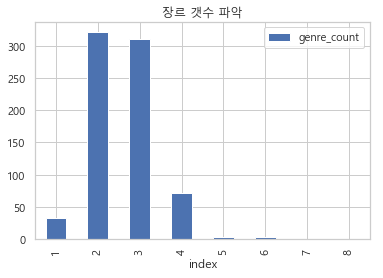

In [126]:
genre_count.plot(kind='bar', x='index', title="장르 갯수 파악")

한 개의 작품은 대부분 2~3개의 장르를 가지고 있다.

In [127]:
# 장르 갯수와 평점 상관관계
df_info2[['total_score','genre_count']].corr()

,total_score,genre_count
total_score,1.000000,0.104917
genre_count,0.104917,1.000000


---

In [1]:
df_episode = pd.read_csv("data_Juno/episode_per_webtoon_naver.csv")
df_info = pd.read_csv("data_Juno/webtoon_naver_info_by_genres.csv")

In [34]:
df_info[['total_score','like_count']].corr()

,total_score,like_count
total_score,1.000000,0.082428
like_count,0.082428,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


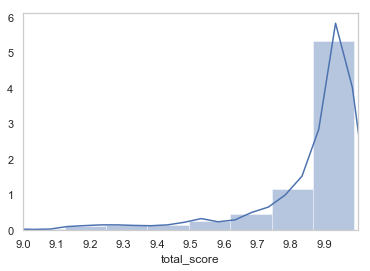

In [25]:
sns.distplot(df_info['total_score']) 
plt.xlim(9,10)
plt.xticks(np.arange(9,10,0.1))
plt.grid(False)
plt.show()

평점의 분포는 한쪽으로 치우쳐있다

In [26]:
df_info['total_score'].describe()

count    745.000000
mean       9.752792
std        0.580419
min        3.810000
25%        9.800000
50%        9.920000
75%        9.950000
max        9.990000
Name: total_score, dtype: float64

In [28]:
df_info['like_count'].describe()

count    7.450000e+02
mean     1.019224e+05
std      1.734545e+05
min      1.200000e+01
25%      6.917000e+03
50%      4.829000e+04
75%      1.239050e+05
max      1.850629e+06
Name: like_count, dtype: float64

In [33]:
df_info[df_info['like_count'] >= 99999].size

45

#### 1. 연도별로 웹툰을 나눠보자

In [39]:
df_info['update_date'] = pd.to_datetime(df_info['update_date'])

In [41]:
df_info['year'] = df_info['update_date'].map(lambda x:x.year)

In [67]:
# 완결시점 기준
df_info['year'].value_counts()

2018    228
2015     79
2016     69
2017     61
2014     60
2012     59
2013     54
2011     46
2010     39
2009     25
2008     18
2007      5
2006      2
Name: year, dtype: int64

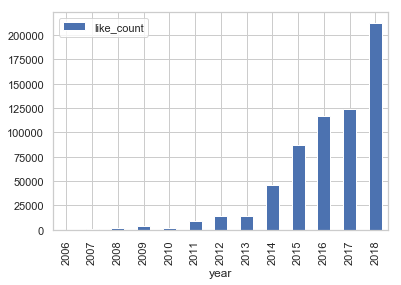

In [70]:
like_mean_by_year = df_info[['year','like_count']].groupby('year').agg('mean')
like_mean_by_year.plot(kind='bar')

In [1]:
df_info1 = pd.read_csv("data_Juno/webtoon_naver_info_by_genres.csv")
df_info1.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,genre,like_count
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,story/pure/sensibility,76459
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,story,13787
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,story/drama/sensibility,3564
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,story/fantasy/drama,21366
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,story/comic/drama,29


In [12]:
df_info2 = pd.read_csv("data_Juno/webtoon_naver_info_by_genres_seperated.csv")
df_info2.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,daily,comic,fantasy,action,drama,pure,sensibility,thrill,historical,sports
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,None,None,story,None,None,None,None,None,pure,sensibility,None,None,None
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,None,None,story,None,None,None,None,None,None,None,None,None,None
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,None,None,story,None,None,None,None,drama,None,sensibility,None,None,None
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,None,None,story,None,None,fantasy,None,drama,None,None,None,None,None
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,None,None,story,None,comic,None,None,drama,None,None,None,None,None


In [13]:
df_info2['like_count'] = df_info1['like_count'].values

In [14]:
df_info2.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,...,comic,fantasy,action,drama,pure,sensibility,thrill,historical,sports,like_count
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,None,None,story,...,None,None,None,None,pure,sensibility,None,None,None,76459
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,None,None,story,...,None,None,None,None,None,None,None,None,None,13787
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,None,None,story,...,None,None,None,drama,None,sensibility,None,None,None,3564
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,None,None,story,...,None,fantasy,None,drama,None,None,None,None,None,21366
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,None,None,story,...,comic,None,None,drama,None,None,None,None,None,29


In [15]:
df = df_info2.copy()

In [85]:
for genre in df.columns[7:-1]:
    df[genre] = df[genre].map(lambda x : 1 if x !='None' else 0)
df.tail()

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,...,action,drama,pure,sensibility,thrill,historical,sports,like_count,count,popular
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,0,0,1,...,0,0,1,1,0,0,0,76459,1,0
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,0,0,1,...,0,0,0,0,0,0,0,13787,1,0
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,0,0,1,...,0,1,0,1,0,0,0,3564,1,0
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,0,0,1,...,0,1,0,0,0,0,0,21366,1,0
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,0,0,1,...,0,1,0,0,0,0,0,29,1,0


In [18]:
df['count'] = 1

#### 2. 하트 수 99,999개 이상을 인기웹툰으로 가정하여, 인기웹툰과 비인기 웹툰의 분포를 나누어 본다.

In [82]:
df['popular'] = df['like_count'].map(lambda x : 1 if x > 99999 else 0)

In [83]:
df['popular'].value_counts()

0    515
1    230
Name: popular, dtype: int64

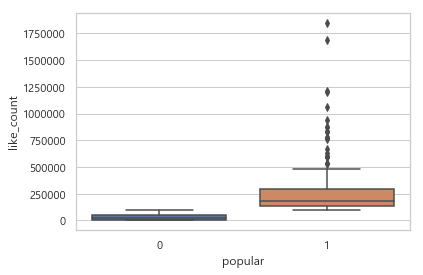

In [84]:
sns.boxplot(x='popular', y='like_count', data=df)

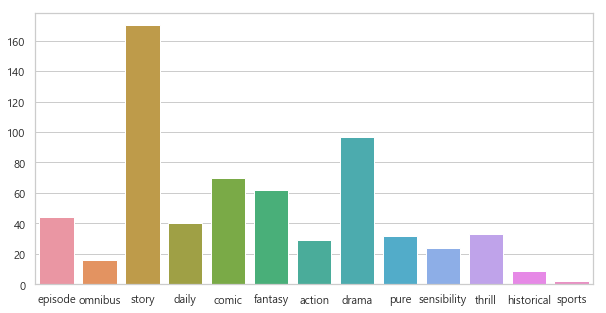

In [94]:
# 인기(popular)웹툰의 장르는?
popular = df[df.popular == 1]

p = {}
p['column'] = []
p['count'] = []

for column in popular.columns[7:-3]:
    p['count'].append(popular[column].value_counts()[1])
    p['column'].append(column)
    
plt.figure(figsize=(10,5))
sns.barplot(x=p['column'], y=p['count'])

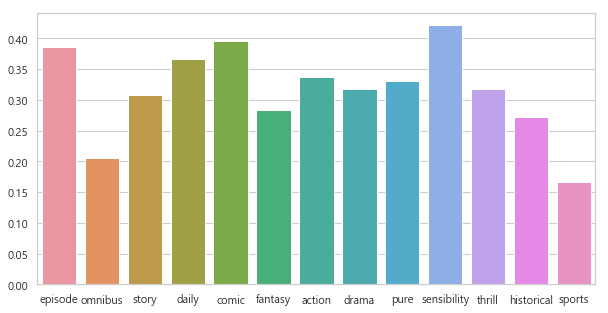

In [102]:
# 장르별 인기웹툰의 비중 (인기/전체, %)
plt.figure(figsize=(10,5))
sns.barplot(x=p['column'], y=np.array(p['count'])/np.array(dic['count'] ))

**episode, sensibility, comic, daily 등이 알짜배기 장르**

---


In [105]:
df[df.sensibility == 1]

,unique_id,title,author,total_score,main_link,image_link,update_date,episode,omnibus,story,...,action,drama,pure,sensibility,thrill,historical,sports,like_count,count,popular
13,113121,겨울동화,심윤수,9.89,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2010.03.19,1,0,0,...,0,0,0,1,0,0,0,1115,1,0
23,651664,밥 먹고 갈래요?,오묘,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,1,0,0,...,0,1,0,1,0,0,0,366990,1,1
25,55143,일상날개짓,나유진,9.94,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.05.19,1,0,0,...,0,0,0,1,0,0,0,13217,1,0
31,650304,슈퍼 시크릿,이온,9.98,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.01.29,1,0,0,...,0,0,1,1,0,0,0,396081,1,1
32,316912,내 어린고양이와 늙은개,초,9.95,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.19,1,0,0,...,0,0,0,1,0,0,0,14289,1,0
36,703850,자판귀,윤정민,9.96,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.09.03,1,0,0,...,0,0,0,1,1,0,0,181934,1,1
37,150389,스마일브러시,와루,9.94,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2010.06.26,1,0,0,...,0,0,0,1,0,0,0,106414,1,1
48,604147,터치! 메리크리스마스,웹툰작가,9.78,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2014.01.07,1,0,0,...,0,1,1,1,1,0,0,145085,1,1
55,183558,"스마일 브러시, 오래된 사...",와루,9.94,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2011.07.29,1,0,0,...,0,0,0,1,0,0,0,134463,1,1
75,26216,일편단심화,심윤수,9.79,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2009.09.04,1,0,0,...,0,0,0,1,0,0,0,28302,1,0


In [38]:
# 장르별 추천수
dic = {}
dic['column'] = []
dic['count'] = []
dic['like_mean'] = []
dic['like_median'] = []
for column in df.columns[7:-2]:
#     print(column)
    dic['count'].append(df[column].value_counts()[1])
    dic['column'].append(column)
    dic['like_mean'].append(df[[column,'like_count']].groupby(column).agg('mean').values[1][0])
    dic['like_median'].append(df[[column,'like_count']].groupby(column).agg('median').values[1][0])

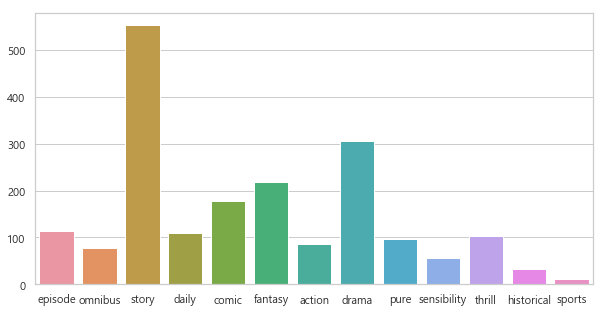

In [39]:
# 장르별 작품수
plt.figure(figsize=(10,5))
sns.barplot(x=dic['column'], y=dic['count'])

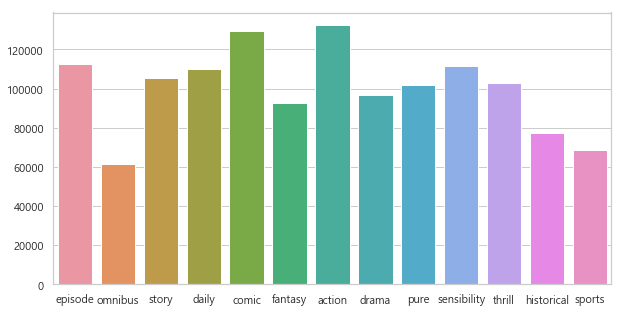

In [40]:
# 장르별 좋아요 수 평균
plt.figure(figsize=(10,5))
sns.barplot(x=dic['column'], y=dic['like_mean'])

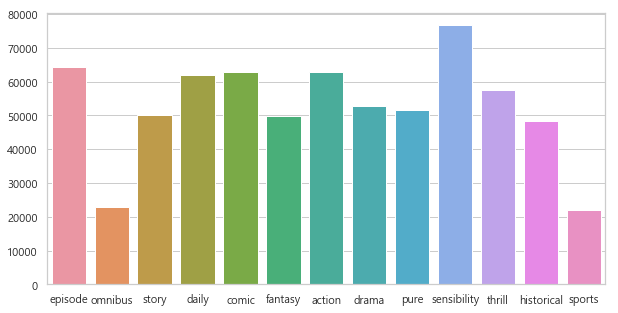

In [41]:
# 장르별 좋아요 수 중앙값
plt.figure(figsize=(10,5))
sns.barplot(x=dic['column'], y=dic['like_median'])

In [ ]:
for column in df.columns[7:-2]:
    df[df.column == 1].describe

In [50]:
df[df.story == 1]['like_count'].describe()

count    5.530000e+02
mean     1.054132e+05
std      1.806302e+05
min      1.200000e+01
25%      7.624000e+03
50%      5.026000e+04
75%      1.233600e+05
max      1.850629e+06
Name: like_count, dtype: float64

In [69]:
# 장르별 좋아요 수 boxplot
dic['like_dist'] = []
for column in df.columns[7:-2]:
    dic['like_dist'].append(list(df[df[column] == 1]['like_count'].values))

([<matplotlib.axis.XTick at 0x2b646f2d710>,
 <a list of 13 Text xticklabel objects>)

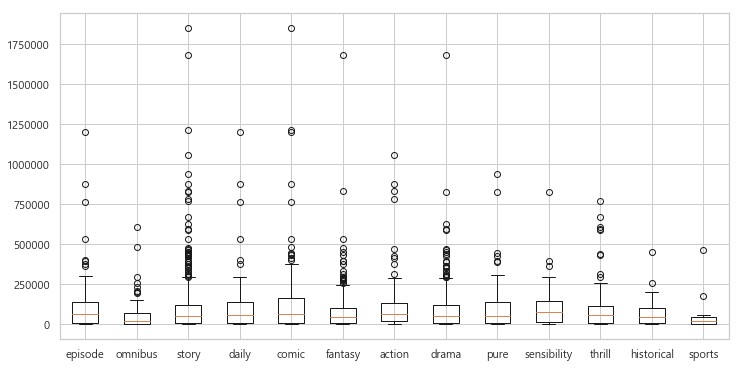

In [81]:
plt.figure(figsize=(12, 6))
plt.boxplot(dic['like_dist'])
plt.xticks(np.arange(1,14,1), dic['column'])

** **
---

### 회차별 EDA

In [129]:
df_episode = pd.read_csv("data_Juno/episode_per_webtoon_naver.csv")
df_episode.tail()

,title,image_link,episode,titleid,episode_cnt,total_comments,episode_score,episode_like
54723,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 5화 <침투(2)>,22073,5,419,8.93,7
54724,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 4화 <침투(1)>,22073,4,384,9.00,6
54725,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 3화 <화산>,22073,3,507,9.10,11
54726,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 2화 <레이저 빔(2)>,22073,2,577,8.91,9
54727,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 1화 <레이저 빔(1)>,22073,1,945,8.91,11


In [117]:
webtoon = df_episode[['title','titleid','episode_cnt','total_comments','episode_score']].groupby(['title','titleid'],as_index=False).agg({'episode_cnt':'first',
                                                                                                                 'total_comments': np.sum,
                                                                                                                 'episode_score':np.mean})

In [119]:
webtoon.tail()

,title,titleid,episode_cnt,total_comments,episode_score
740,후유증,471284,3,18297,9.773333
741,후유증 2,662160,3,7245,9.846667
742,흐드러지다,72499,11,13731,9.832727
743,히어로메이커,21815,630,509910,9.957154
744,힘내요 일본!-[릴레이웹툰],312979,36,42398,6.788611


In [128]:
# 웹툰 정보와 merge
df_merged = df.merge(webtoon,left_on='unique_id', right_on='titleid')
df_merged.drop(columns=['title_y','titleid'], inplace=True)
df_merged.tail()

,unique_id,title_x,author,total_score,main_link,image_link,update_date,episode,omnibus,story,...,sensibility,thrill,historical,sports,like_count,count,popular,episode_cnt,total_comments,episode_score
740,622643,진눈깨비 소년,쥬드프라이데이,9.97,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.08.30,0,0,1,...,1,0,0,0,76459,1,0,224,201491,9.963036
741,703840,한국만화 1990,웹툰작가,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2018.05.17,0,0,1,...,0,0,0,0,13787,1,0,20,10275,9.697000
742,336945,길에서 만나다,쥬드프라이데이,9.75,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2013.01.17,0,0,1,...,1,0,0,0,3564,1,0,16,10191,9.746875
743,515883,사또(Satto),최윤진,9.80,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2015.12.29,0,0,1,...,0,0,0,0,21366,1,0,12,20984,9.854167
744,347685,슈퍼트리오 시즌2,황미나,7.36,https://comic.naver.com/webtoon/list.nhn?title...,https://shared-comic.pstatic.net/thumb/webtoon...,2012.06.04,0,0,1,...,0,0,0,0,29,1,0,6,1374,7.354000


```
<info table>
total_score : 웹툰 자체 평점
episode_score : 웹툰 회차 평점의 평균
total_comments : 총 댓글수
episode_cnt : 최종 회차
```

In [130]:
df_episode.tail()

,title,image_link,episode,titleid,episode_cnt,total_comments,episode_score,episode_like
54723,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 5화 <침투(2)>,22073,5,419,8.93,7
54724,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 4화 <침투(1)>,22073,4,384,9.00,6
54725,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 3화 <화산>,22073,3,507,9.10,11
54726,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 2화 <레이저 빔(2)>,22073,2,577,8.91,9
54727,까뱅,https://shared-comic.pstatic.net/thumb/webtoon...,GGAVANG 1화 <레이저 빔(1)>,22073,1,945,8.91,11


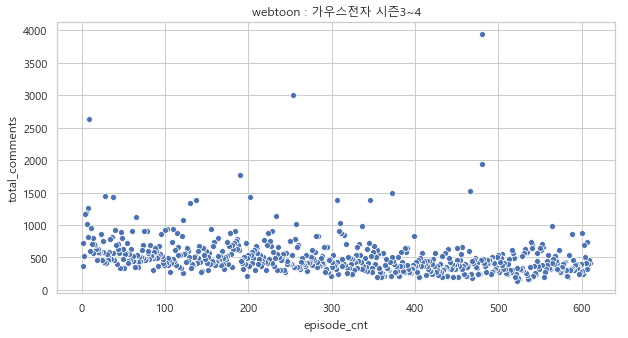

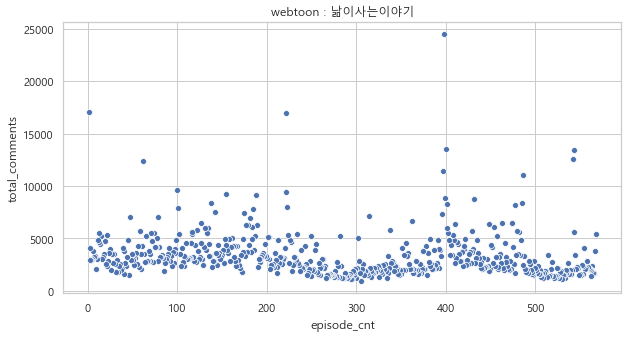

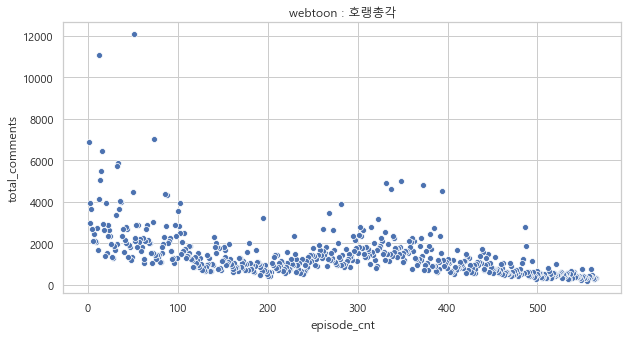

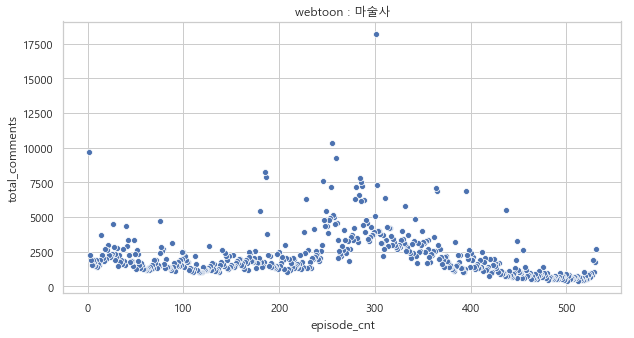

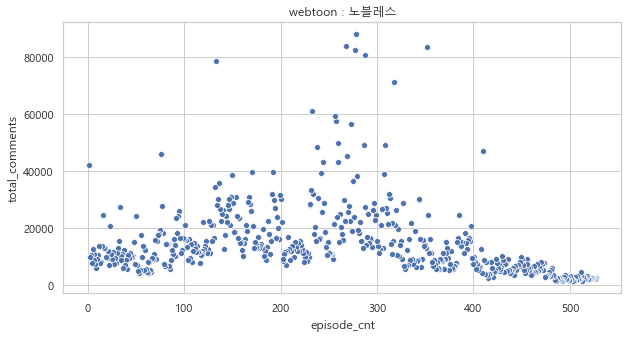

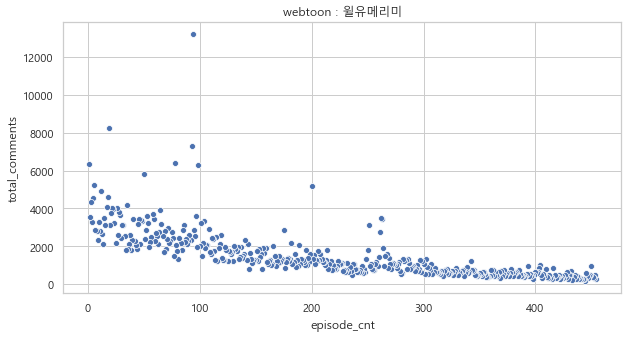

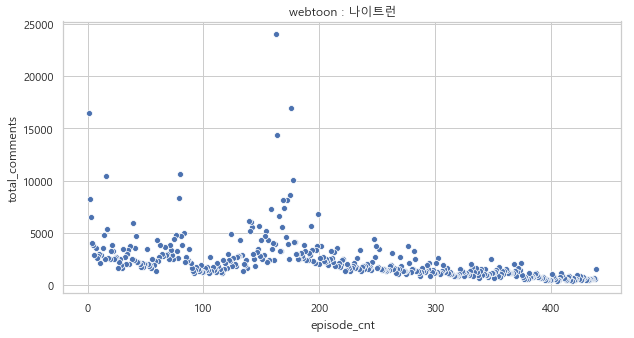

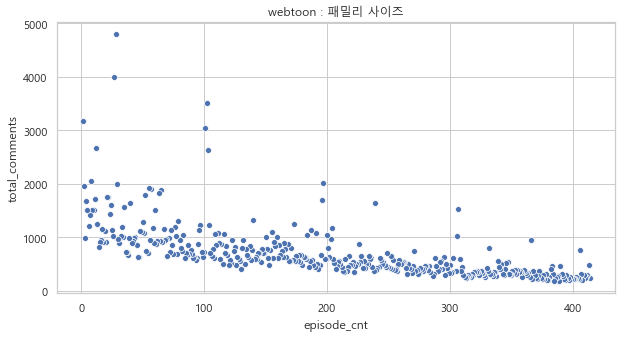

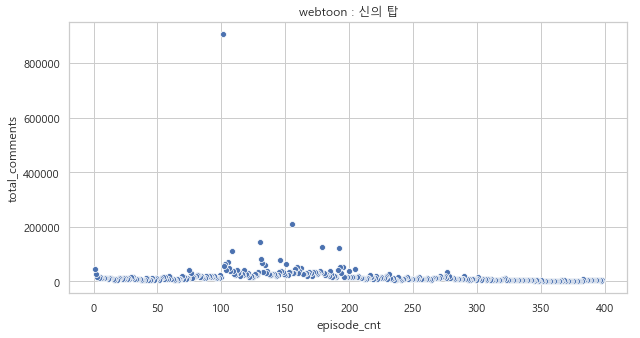

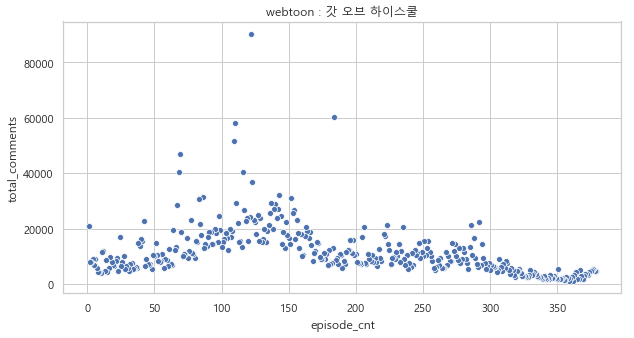

In [146]:
# 회차수 상위 10개 웹툰 : 회차진행에 따른 댓글수 변화
for i, title in enumerate(df_merged.sort_values(by='episode_cnt', ascending=False)['title_x'].values[10:20]):
    plt.figure(figsize=(10,5))
    plt.title("webtoon : {}".format(title))
    sns.scatterplot(data=df_episode[df_episode.title == title],x='episode_cnt', y='total_comments')

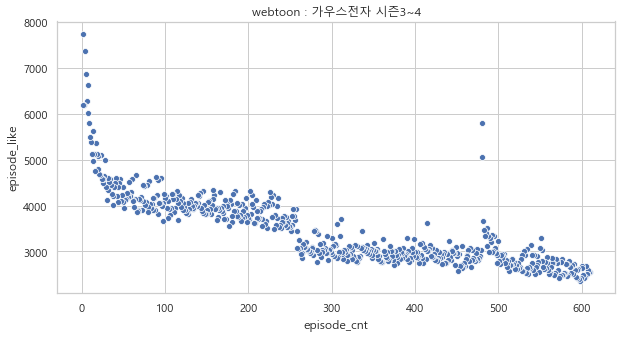

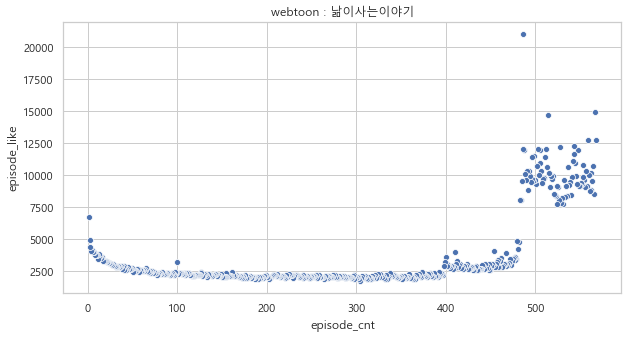

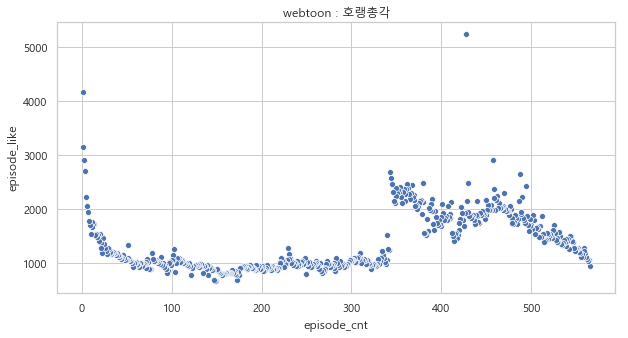

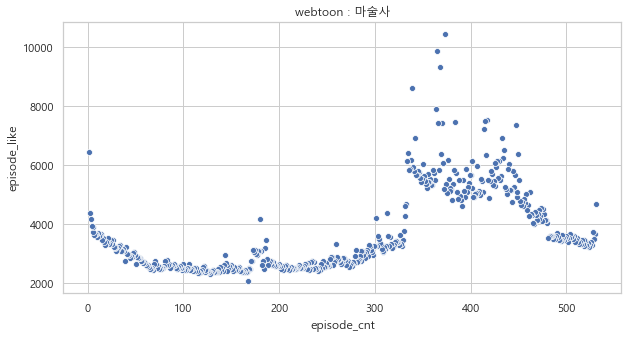

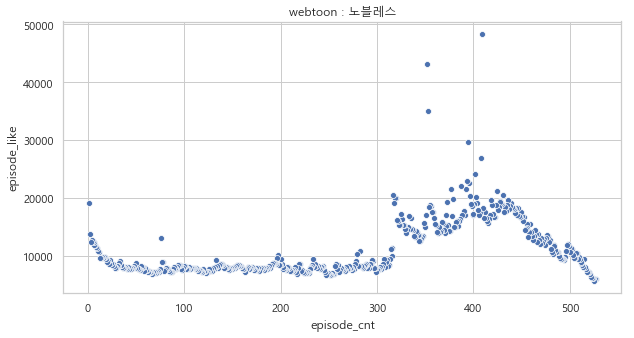

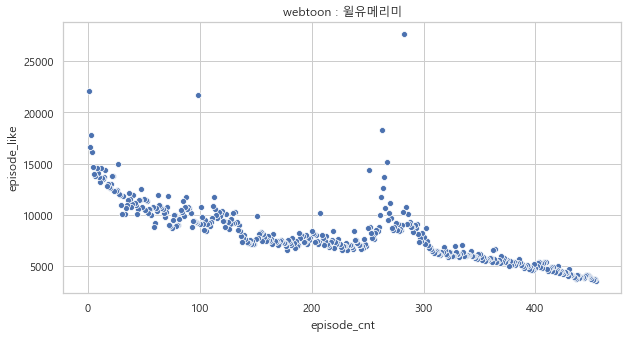

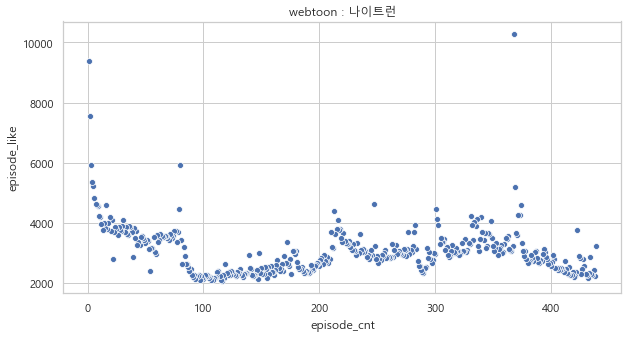

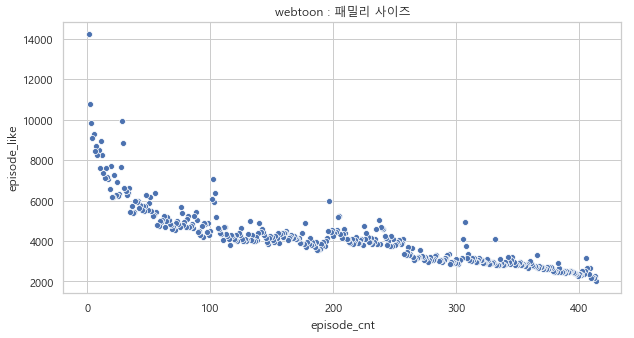

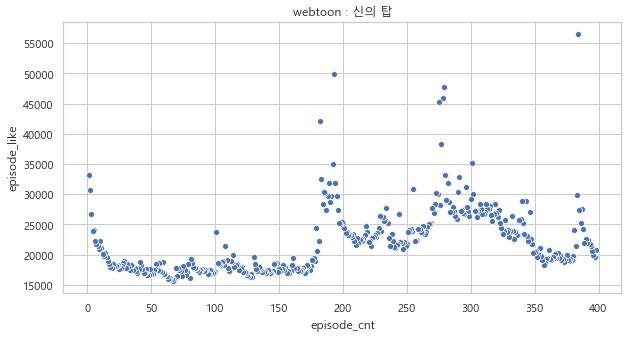

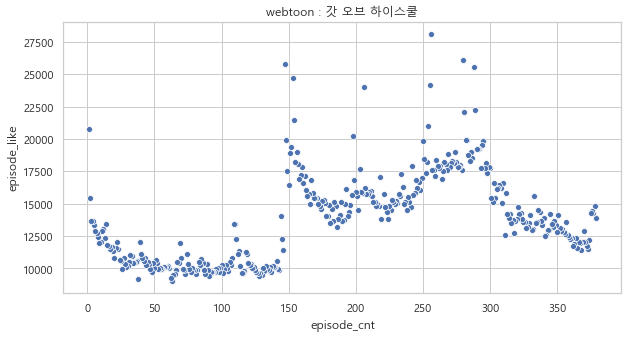

In [148]:
# 회차수 상위 10개 웹툰 : 회차진행에 따른 회차좋아요수 변화
for i, title in enumerate(df_merged.sort_values(by='episode_cnt', ascending=False)['title_x'].values[10:20]):
    plt.figure(figsize=(10,5))
    plt.title("webtoon : {}".format(title))
    sns.scatterplot(data=df_episode[df_episode.title == title],x='episode_cnt', y='episode_like')

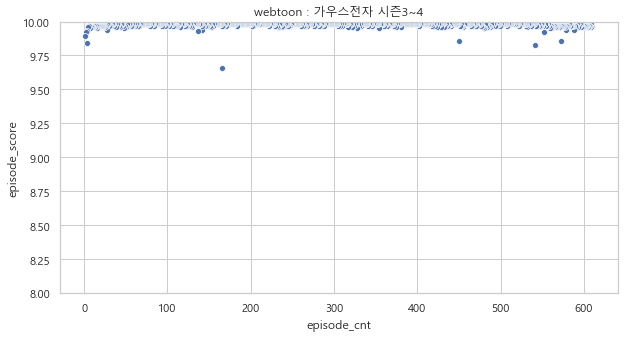

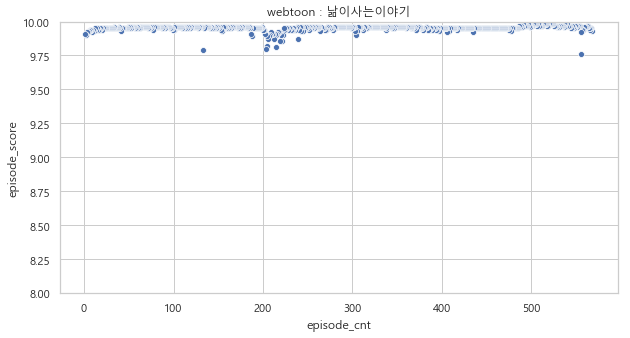

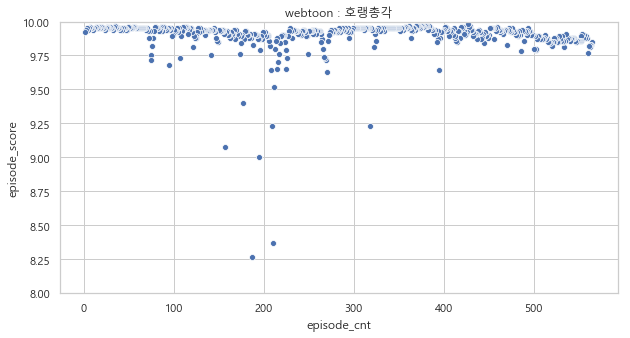

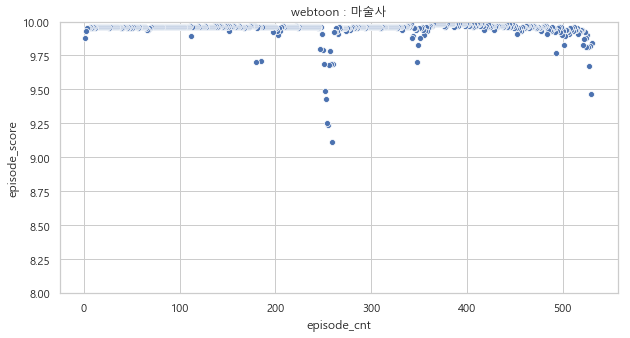

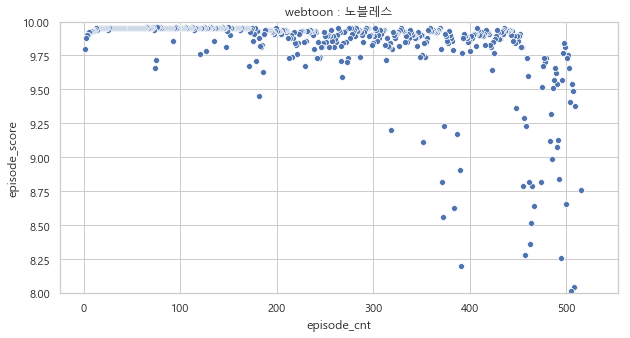

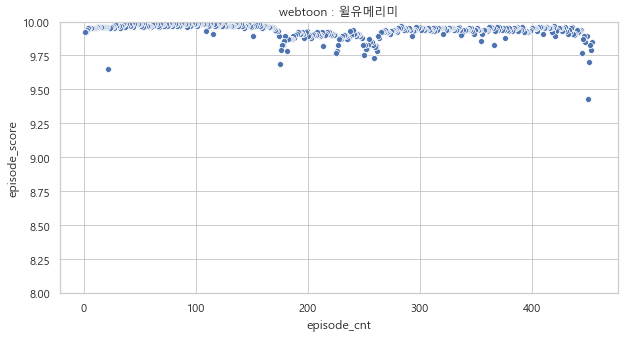

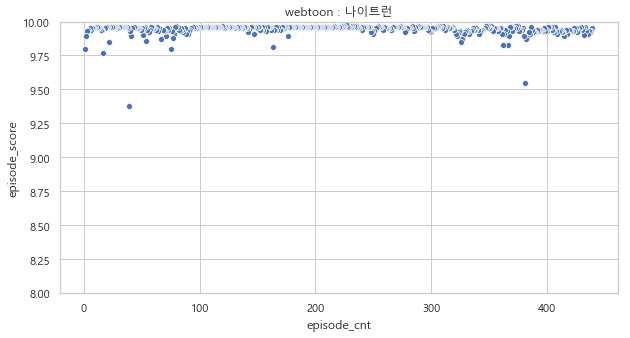

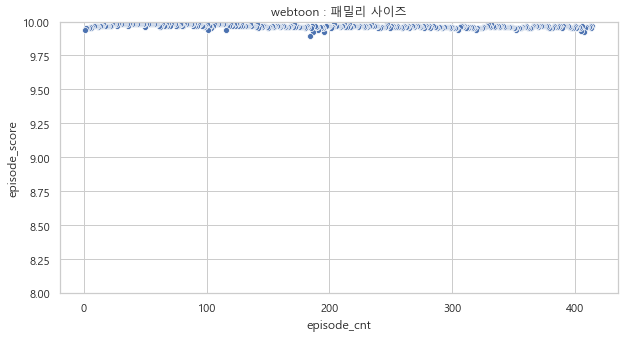

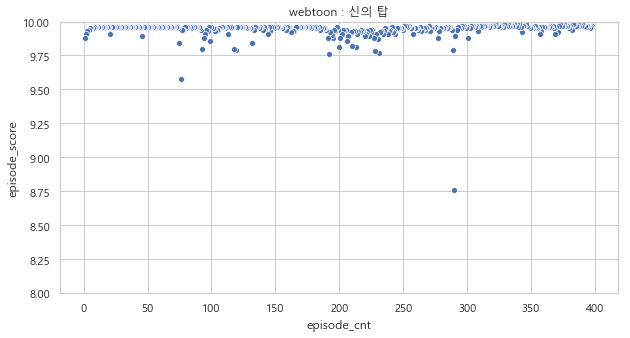

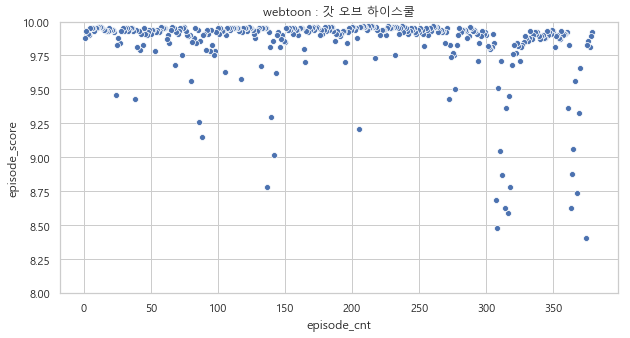

In [151]:
# 회차수 상위 10개 웹툰 : 회차진행에 따른 회차평점 변화
for i, title in enumerate(df_merged.sort_values(by='episode_cnt', ascending=False)['title_x'].values[10:20]):
    plt.figure(figsize=(10,5))
    plt.title("webtoon : {}".format(title))
    plt.ylim(8,10)
    sns.scatterplot(data=df_episode[df_episode.title == title],x='episode_cnt', y='episode_score')

In [154]:
df_episode[['episode_score','total_comments']].corr()

,episode_score,total_comments
episode_score,1.000000,-0.056363
total_comments,-0.056363,1.000000
